Ejercicio Ayudantía 4:

Un inversionista quiere adentrarse en el mundo de las películas, por lo cual decide financiar una de estas para su producción y quiere asegurarse de que esta misma pueda ser exitosa, para esto le solicita a usted, analista de datos, que le ayude a tomar una decisión sobre las características que debiera tener el título en base a las 1000 películas con mejores ratings en IMDb.

Como su objetivo es entrar en esta lista de películas exitosas, este le pide que se fije en cosas como:

-Cuanto tiempo debieran durar la película (un rango óptimo)
-Cual(es) debiera ser el género de la película
-Quien o quienes podría(n) dirigir esta película
-Quien debiera ser el actor/a principal y secundario
-Qué certificado debiera conseguir para la película

Finalmente le solicita un gran uso de gráfico, pues si bien no tiene gran problema con ver datos numéricos, este entiende mejor al ver gráficos que al ver números. Ayude al inversionista.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Limpieza de datos

In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

Como se puede observar, hay que arreglar el Gross, La duración y separar los géneros

In [6]:
#Arreglando el gross
df['Gross'] = df['Gross'].replace({',': ''}, regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors = 'coerce')
df['Gross'].isna().sum()

169

In [7]:
#Arreglando la duración
df['Runtime'] = df['Runtime'].replace({' min': ''}, regex=True)
df['Runtime'] = df['Runtime'].replace(np.nan, 0)
df['Runtime'] = df['Runtime'].astype(int)

In [8]:
#Arreglando el género
df['Genre'] = [i.split(',')[0] for i in df['Genre']]

Gráficos ejemplo

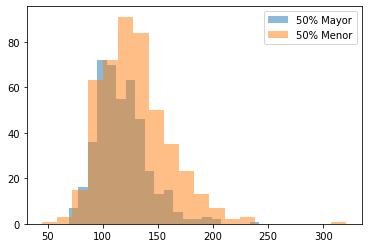

In [9]:
#Histograma
plt.hist(df['Runtime'][df['IMDB_Rating'] < df['IMDB_Rating'].quantile(0.5)], bins=20, alpha=0.5,label='50% Mayor')
plt.hist(df['Runtime'][df['IMDB_Rating'] > df['IMDB_Rating'].quantile(0.5)], bins=20, alpha=0.5 ,label='50% Menor')
plt.legend(loc='upper right')
plt.show()

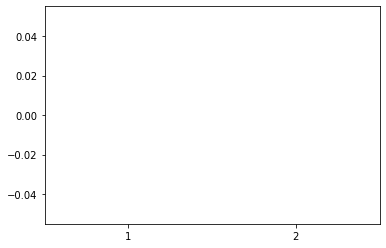

In [12]:
plt.boxplot([df['Gross'][df['Genre'] == 'Action'].dropna(), df['Gross'][df['Genre'] == 'Drama']])
plt.show()